<a href="https://colab.research.google.com/github/WPNJoherrera/DATA-ANALYTICS/blob/Proyectos/Proy03_1er_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Armado de Ambiente

## 1a. Llamado Phyton Librerias


In [ ]:
!pip install statistics

from scipy import stats as nstats

import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy


import matplotlib.pyplot as plt

## 2a. Montaje del Google Drive

In [ ]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/JoHS-Drive/')

Mounted at /content/JoHS-Drive/


#Carga Data Set en un DataFrame



In [ ]:
dfOri = pd.read_excel('/content/JoHS-Drive/MyDrive/Data & Analitics (Phyton Machine Learning)/Data/Data_Nutricion_grupos.xlsx')

dfOri.head()



Individuo  talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  \
0  Persona 1  155.7  16.0     71.2           35.7  29.576170            90.0   
1  Persona 2  166.5  16.0     61.0           31.8  22.364707            80.9   
2  Persona 3  151.3  16.0     49.1           30.5  21.623567            72.0   
3  Persona 4  151.7  16.0     54.6           32.6  23.117479             NaN   
4  Persona 5  160.3  16.0     58.0           30.1  22.260196             NaN   

   cadera  ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0    98.0            0.918367              0.578035           36.446202   
1   100.5            0.804975              0.485886           28.790714   
2    86.0            0.837209              0.475876           29.867419   
3    88.4            0.841629              0.490442           27.867640   
4    97.9            0.813075                   NaN           30.276688   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0               45.250304                    13.0                     27.0   
1               43.437664                     5.0                     19.0   
2               34.435097                    13.0                     18.0   
3               39.384269                     5.0                     19.0   
4               40.439521                    10.0                     19.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO Grupos  
0                       32.0                         34.0      A  
1                       15.0                         22.0      A  
2                       18.0                         17.0      A  
3                       15.0                         18.0      A  
4                       20.0                         19.0      A

##Gestion del Data Frame

In [ ]:
#Preparacion del DSet Para el analisis.

df = dfOri.copy(deep=True)

##df.info()

print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",   df.shape[0])
print("Cantidad de registros duplicados es: ",  df.duplicated().sum() )



La cantidad de columnas en los datos es:  17
La cantidad de filas en los datos es:  652
Cantidad de registros duplicados es:  0


In [ ]:
# Revisamos los datos perdidos

df.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

#**Estadistica Descriptiva**


##Libreria de funciones


In [ ]:
#
#> Clasifica el IMC
#

def clasificaIMC( numIMC ):

  '''
    Funcion clasificaIMC( numIMC )
    Recive el IMC y devuelve su clasificación
  '''

  vReturn = 'IMC Invalido'

#26.38

  if numIMC < 18.5:
    vReturn = 'peso insuficiente'

  if numIMC >= 18.5 and numIMC < 24.9:
    vReturn = 'peso normal'

  if numIMC >= 25.0 and numIMC < 29.9:
    vReturn = 'sobrepeso'

  if numIMC >= 30:
    vReturn = 'obesidad'

  return vReturn


#
#> Clasifica la Edad
#

def clasificaEdad( numEdad ):

  '''
    Funcion clasificaEdad( numEdad )
    Recive la edad y devuelve la etapa de vida correspondiente
  '''

  vReturn = ''

  if numEdad < 6:
    vReturn = 'Infancia'

  if numEdad >= 6 and numEdad < 12:
    vReturn = 'Niñez'

  if numEdad >= 12 and numEdad < 20:
    vReturn = 'Adolescencia'

  if numEdad >= 20 and numEdad < 25:
    vReturn = 'Juventud'

  if numEdad >= 25 and numEdad < 60:
    vReturn = 'Adultez'

  if numEdad >= 60:
    vReturn = 'Ancianidad'

  return vReturn





##Reclasificacion de variables

In [ ]:
df["IMC-Name"] = df.apply( lambda x: clasificaIMC( numIMC=x["IMC"] ) , axis=1)

df["Etapa-Vida"] = df.apply( lambda x: clasificaEdad( numEdad=x["edad"] ) , axis=1)

df

Individuo  talla  edad  peso_kg  circun_cuello        IMC  \
0      Persona 1  155.7  16.0     71.2           35.7  29.576170   
1      Persona 2  166.5  16.0     61.0           31.8  22.364707   
2      Persona 3  151.3  16.0     49.1           30.5  21.623567   
3      Persona 4  151.7  16.0     54.6           32.6  23.117479   
4      Persona 5  160.3  16.0     58.0           30.1  22.260196   
..           ...    ...   ...      ...            ...        ...   
647  Persona 648  165.5  14.0     88.0           32.5  21.029381   
648  Persona 649  144.2  14.0     48.6           31.5  23.132073   
649  Persona 650  154.0  15.0     58.9           31.5  22.769438   
650  Persona 651  174.3  14.0     88.7           37.0  27.023922   
651  Persona 652  158.0  14.0     57.6           33.0  23.073225   

     circun_cintura  cadera  ind_cintura_cadera  ind_cintura_estatura  \
0              90.0    98.0            0.918367              0.578035   
1              80.9   100.5            0.804975              0.485886   
2              72.0    86.0            0.837209              0.475876   
3               NaN    88.4            0.841629              0.490442   
4               NaN    97.9            0.813075                   NaN   
..              ...     ...                 ...                   ...   
647            72.5    85.0            0.852941              0.438066   
648            73.0    87.5            0.834286              0.506241   
649            85.0    96.0            0.885417              0.551948   
650            85.8   101.0            0.849505              0.492255   
651            78.0    94.0            0.829787              0.493671   

     por_grasa_corporal  masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
0             36.446202               45.250304                    13.0   
1             28.790714               43.437664                     5.0   
2             29.867419               34.435097                    13.0   
3             27.867640               39.384269                     5.0   
4             30.276688               40.439521                    10.0   
..                  ...                     ...                     ...   
647           19.209928               71.095263                    12.0   
648           28.565420               34.717206                     8.0   
649           26.623783               43.218592                     8.0   
650           22.424506               68.809463                    11.0   
651           32.517043               38.870183                    12.0   

     pliegue_cutaneo_TRICEPS  pliegue_cutaneo_ESCAPULAR  \
0                       27.0                       32.0   
1                       19.0                       15.0   
2                       18.0                       18.0   
3                       19.0                       15.0   
4                       19.0                       20.0   
..                       ...                        ...   
647                     13.0                       12.0   
648                     18.0                       18.0   
649                     12.0                       14.0   
650                     16.0                       18.0   
651                     24.0                       20.0   

     pliegue_cutaneo_SUPRAILIACO Grupos     IMC-Name    Etapa-Vida  
0                           34.0      A    sobrepeso  Adolescencia  
1                           22.0      A  peso normal  Adolescencia  
2                           17.0      A  peso normal  Adolescencia  
3                           18.0      A  peso normal  Adolescencia  
4                           19.0      A  peso normal  Adolescencia  
..                           ...    ...          ...           ...  
647                         13.0      B  peso normal  Adolescencia  
648                         16.0      B  peso normal  Adolescencia  
649                         18.0      B  peso normal  Adolescencia  
650          

##Extraccion de las columnas Numericas y String

In [ ]:

var_numCol = df.select_dtypes(include=['float64', 'int']).columns

var_numStr = df.select_dtypes(include=['object']).columns

df[var_numCol].head()


talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  cadera  \
0  155.7  16.0     71.2           35.7  29.576170            90.0    98.0   
1  166.5  16.0     61.0           31.8  22.364707            80.9   100.5   
2  151.3  16.0     49.1           30.5  21.623567            72.0    86.0   
3  151.7  16.0     54.6           32.6  23.117479             NaN    88.4   
4  160.3  16.0     58.0           30.1  22.260196             NaN    97.9   

   ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0            0.918367              0.578035           36.446202   
1            0.804975              0.485886           28.790714   
2            0.837209              0.475876           29.867419   
3            0.841629              0.490442           27.867640   
4            0.813075                   NaN           30.276688   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0               45.250304                    13.0                     27.0   
1               43.437664                     5.0                     19.0   
2               34.435097                    13.0                     18.0   
3               39.384269                     5.0                     19.0   
4               40.439521                    10.0                     19.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO  
0                       32.0                         34.0  
1                       15.0                         22.0  
2                       18.0                         17.0  
3                       15.0                         18.0  
4                       20.0                         19.0

In [ ]:
df[var_numStr].head()

Individuo Grupos     IMC-Name    Etapa-Vida
0  Persona 1      A    sobrepeso  Adolescencia
1  Persona 2      A  peso normal  Adolescencia
2  Persona 3      A  peso normal  Adolescencia
3  Persona 4      A  peso normal  Adolescencia
4  Persona 5      A  peso normal  Adolescencia

# ***Evaluacion con scipy, por la existencia de datos perdidos.***


#**A.MEDIDAS DE TENDENCIA CENTRAL**

### Media

In [ ]:
def scipyMean(x):
  return scipy.nanmean(x)

# Media
df[var_numCol].apply(scipyMean, axis=0).round(2)


<ipython-input-12-fa10dbd171ac>:2: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  return scipy.nanmean(x)


talla                          158.82
edad                            14.75
peso_kg                         56.94
circun_cuello                   32.14
IMC                             22.43
circun_cintura                  74.52
cadera                          89.87
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              23.54
masa_corporal_magra_kg          43.38
pliegue_cutaneo_BICEPS           9.18
pliegue_cutaneo_TRICEPS         15.65
pliegue_cutaneo_ESCAPULAR       14.38
pliegue_cutaneo_SUPRAILIACO     14.68
dtype: float64

### Mediana

In [ ]:
def scipyMedian(x):
  return scipy.nanmedian(x)

# Media
df[var_numCol].apply(scipyMedian, axis=0).round(2)

<ipython-input-13-bde2716fd830>:2: DeprecationWarning: scipy.nanmedian is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmedian instead
  return scipy.nanmedian(x)


talla                          158.20
edad                            15.00
peso_kg                         55.80
circun_cuello                   32.00
IMC                             22.17
circun_cintura                  73.60
cadera                          89.00
ind_cintura_cadera               0.83
ind_cintura_estatura             0.46
por_grasa_corporal              26.09
masa_corporal_magra_kg          42.36
pliegue_cutaneo_BICEPS           8.00
pliegue_cutaneo_TRICEPS         16.00
pliegue_cutaneo_ESCAPULAR       14.00
pliegue_cutaneo_SUPRAILIACO     15.00
dtype: float64

### Moda

In [ ]:
from collections import Counter

def Moda(x):
  c = Counter(x)
  return c.most_common(1)

df[var_numCol].apply(Moda, axis=0)

talla         edad    peso_kg circun_cuello                     IMC  \
0  (156.0, 9)  (14.0, 245)  (57.0, 9)    (30.5, 37)  (27.12031558185404, 2)   

  circun_cintura      cadera ind_cintura_cadera     ind_cintura_estatura  \
0     (71.0, 28)  (90.0, 28)           (0.8, 5)  (0.4110429447852761, 2)   

         por_grasa_corporal masa_corporal_magra_kg pliegue_cutaneo_BICEPS  \
0  (28.790714086448155, 18)  (38.8027000628237, 2)              (5.0, 82)   

  pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0              (18.0, 53)                (10.0, 61)   

  pliegue_cutaneo_SUPRAILIACO  
0                  (18.0, 49)

### Centro Amplitud.
Esel valor que queda en medio de los valores mínimo y maximo.

In [ ]:
def centroAmplitud(x):
  return (max(x) + min(x))/2  # Asignación múltiple


df[var_numCol].apply(centroAmplitud, axis=0).round(2)

talla                          162.10
edad                             8.50
peso_kg                         62.50
circun_cuello                   31.85
IMC                             25.62
circun_cintura                  81.25
cadera                          95.30
ind_cintura_cadera               0.84
ind_cintura_estatura             0.53
por_grasa_corporal              21.83
masa_corporal_magra_kg          50.03
pliegue_cutaneo_BICEPS          46.00
pliegue_cutaneo_TRICEPS         22.00
pliegue_cutaneo_ESCAPULAR       20.00
pliegue_cutaneo_SUPRAILIACO     19.00
dtype: float64

### Media Geométrica

In [ ]:
#import numpy as np

def media_geometrica(iterable):
  ''' Calcula la media geométrica'''
  a = np.log(iterable)
  return "Media Geométrica", np.exp(a.sum()/len(a)).round(2)



In [ ]:
df[var_numCol].apply(media_geometrica, axis=0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


talla              edad           peso_kg     circun_cuello  \
0  Media Geométrica  Media Geométrica  Media Geométrica  Media Geométrica   
1            127.62               0.0             48.86             27.48   

                IMC    circun_cintura            cadera ind_cintura_cadera  \
0  Media Geométrica  Media Geométrica  Media Geométrica   Media Geométrica   
1              21.0             67.21             86.55               0.83   

  ind_cintura_estatura por_grasa_corporal masa_corporal_magra_kg  \
0     Media Geométrica   Media Geométrica       Media Geométrica   
1                 0.48              21.73                  41.87   

  pliegue_cutaneo_BICEPS pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0       Media Geométrica        Media Geométrica          Media Geométrica   
1                   7.92                   14.55                     13.44   

  pliegue_cutaneo_SUPRAILIACO  
0            Media Geométrica  
1                       13.36

### Media Armonica

In [ ]:
# Función:
def media_armonica(x):
  return "Media Armónica", round(stats.harmonic_mean(x),2)

In [ ]:
df[var_numCol].apply(media_armonica, axis=0)

talla            edad         peso_kg   circun_cuello  \
0  Media Armónica  Media Armónica  Media Armónica  Media Armónica   
1             NaN               0             NaN             NaN   

              IMC  circun_cintura          cadera ind_cintura_cadera  \
0  Media Armónica  Media Armónica  Media Armónica     Media Armónica   
1             NaN             NaN             NaN                NaN   

  ind_cintura_estatura por_grasa_corporal masa_corporal_magra_kg  \
0       Media Armónica     Media Armónica         Media Armónica   
1                  NaN                NaN                    NaN   

  pliegue_cutaneo_BICEPS pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0         Media Armónica          Media Armónica            Media Armónica   
1                   6.86                   13.37                     12.53   

  pliegue_cutaneo_SUPRAILIACO  
0              Media Armónica  
1                       11.94

### Media Recortada con scipy.
Por la existencias de datos perdidos, se recorta
Al 20%; 10% en cada lado

In [ ]:
#from scipy import stats as nstats

def media_recortada(x):
  mr = nstats.trim_mean(x, proportiontocut=0.1).round(2) # 20% pq es 10% de cada lado
  return "Media recortada al 20%", mr

In [ ]:
df[var_numCol].apply(media_recortada, axis=0)

talla                    edad                 peso_kg  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                  159.23                   14.77                   56.87   

            circun_cuello                     IMC          circun_cintura  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                   32.23                    22.3                   74.31   

                   cadera      ind_cintura_cadera    ind_cintura_estatura  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                   89.52                    0.83                    0.47   

       por_grasa_corporal  masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                   23.99                   43.04                    8.62   

  pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0  Media recortada al 20%    Media recortada al 20%   
1                   15.44                     13.97   

  pliegue_cutaneo_SUPRAILIACO  
0      Media recortada al 20%  
1                       14.48

### TriMedia


In [ ]:
def trimedia(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    t = (Q1 + 2*Q2 + Q3) / 4
    return t

In [ ]:

df[var_numCol].apply(trimedia, axis=0).round(2)


talla                          158.45
edad                            14.75
peso_kg                         56.08
circun_cuello                   32.05
IMC                             22.13
circun_cintura                  73.80
cadera                          89.25
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              24.56
masa_corporal_magra_kg          42.75
pliegue_cutaneo_BICEPS           8.25
pliegue_cutaneo_TRICEPS         15.50
pliegue_cutaneo_ESCAPULAR       14.00
pliegue_cutaneo_SUPRAILIACO     14.75
dtype: float64

### Varias medidas de tendencia central y gráficos

In [ ]:
pd.pivot_table(df, index=["IMC-Name"],
               aggfunc=["mean", "median"]).reset_index().round(2)

In [ ]:
mediasDf = pd.pivot_table(df, index=["IMC-Name"], aggfunc="mean").reset_index().round(2)

mediasDf

<ipython-input-26-edcde2ccb4e9>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  mediasDf = pd.pivot_table(df, index=["IMC-Name"], aggfunc="mean").reset_index().round(2)


IMC-Name    IMC  cadera  circun_cintura  circun_cuello   edad  \
0       IMC Invalido  26.38   91.79           76.55          32.93  15.06   
1           obesidad  32.61  109.55           93.23          36.80  14.83   
2  peso insuficiente  17.48   80.45           66.69          29.87  13.95   
3        peso normal  21.68   88.42           73.06          31.69  14.78   
4          sobrepeso  26.81   98.68           83.18          34.78  14.89   

   ind_cintura_cadera  ind_cintura_estatura  masa_corporal_magra_kg  peso_kg  \
0                0.83                  0.48                   43.37    59.14   
1                0.86                  0.60                   52.23    79.13   
2                0.83                  0.42                   39.35    45.93   
3                0.83                  0.46                   42.80    55.27   
4                0.85                  0.53                   46.94    66.95   

   pliegue_cutaneo_BICEPS  pliegue_cutaneo_ESCAPULAR  \
0                   10.13                      15.26   
1                   16.83                      24.42   
2                    4.92                       8.37   
3                    8.71                      13.36   
4                   12.27                      20.86   

   pliegue_cutaneo_SUPRAILIACO  pliegue_cutaneo_TRICEPS  por_grasa_corporal  \
0                        16.79                    16.55               24.90   
1                        23.58                    24.58               33.94   
2                         7.50                     9.17               14.63   
3                        13.77                    14.79               22.70   
4                        20.90                    21.54               29.95   

    talla  
0  157.56  
1  155.81  
2  160.19  
3  158.98  
4  158.00

### Graficación de Medias

<ipython-input-47-b2e1d7c50505>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(y="IMC",


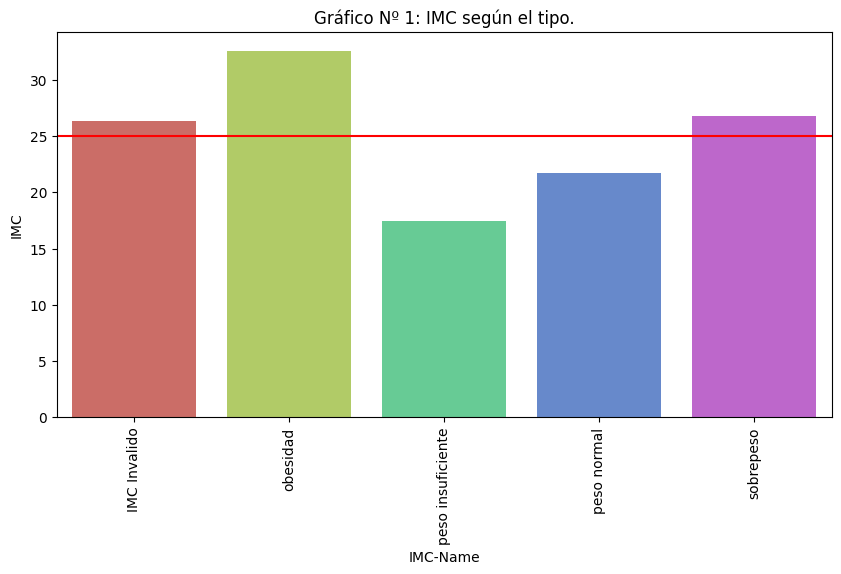

In [ ]:
# Graficamos las medias según una variable
plt.figure(figsize=(10,5))

g = sns.barplot(y="IMC",
            x="IMC-Name",
            data=mediasDf,
            palette="hls" # "Blues"
            )
g.set_xlabel("IMC-Name")
g.set_ylabel("IMC")
g.set_title("Gráfico Nº 1: IMC según el tipo.")

plt.axhline(25, color = 'red')  # añadimos una línea
plt.xticks(rotation=90)  # rotación del texto eje X
plt.show()

#**B.MEDIDAS DE DISPERSION**

### 1.Rango


In [ ]:
def fnRango(x):
  min = np.min(x)
  max = np.max(x)
  r = max - min
  return min, max, r

In [ ]:
d = df[var_numCol].apply(fnRango, axis=0).T.round(2)
d.columns = ["Mínimo","Máximo","Rango"]
d

Mínimo  Máximo  Rango
talla                        135.60  188.60  53.00
edad                           0.00   17.00  17.00
peso_kg                       33.90   91.10  57.20
circun_cuello                 24.50   39.20  14.70
IMC                           14.54   36.71  22.17
circun_cintura                55.00  107.50  52.50
cadera                        69.80  120.80  51.00
ind_cintura_cadera             0.65    1.03   0.37
ind_cintura_estatura           0.36    0.70   0.34
por_grasa_corporal             4.21   39.45  35.23
masa_corporal_magra_kg        28.50   71.57  43.07
pliegue_cutaneo_BICEPS         2.00   90.00  88.00
pliegue_cutaneo_TRICEPS        5.00   39.00  34.00
pliegue_cutaneo_ESCAPULAR      5.00   35.00  30.00
pliegue_cutaneo_SUPRAILIACO    3.00   35.00  32.00

### 2.Cuartiles

In [ ]:
def fnCuartiles(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    min = np.min(x)
    max = np.max(x)
    return min, Q1, Q2, Q3, max

In [ ]:
#Obtenemos los Quartiles
d = df[var_numCol].apply(fnCuartiles, axis=0).T.round(2)
d.columns = ["Mínimo","P25% - Q1","P50% - Q2", "P75% - Q3", "Máximo"]
d

Mínimo  P25% - Q1  P50% - Q2  P75% - Q3  Máximo
talla                        135.60     153.70     158.20     163.70  188.60
edad                           0.00      14.00      15.00      15.00   17.00
peso_kg                       33.90      51.00      55.80      61.70   91.10
circun_cuello                 24.50      30.70      32.00      33.50   39.20
IMC                           14.54      20.27      22.17      23.91   36.71
circun_cintura                55.00      70.00      73.60      78.00  107.50
cadera                        69.80      85.00      89.00      94.00  120.80
ind_cintura_cadera             0.65       0.79       0.83       0.87    1.03
ind_cintura_estatura           0.36       0.44       0.46       0.49    0.70
por_grasa_corporal             4.21      15.97      26.09      30.07   39.45
masa_corporal_magra_kg        28.50      38.15      42.36      48.12   71.57
pliegue_cutaneo_BICEPS         2.00       5.00       8.00      12.00   90.00
pliegue_cutaneo_TRICEPS        5.00      11.00      16.00      19.00   39.00
pliegue_cutaneo_ESCAPULAR      5.00      10.00      14.00      18.00   35.00
pliegue_cutaneo_SUPRAILIACO    3.00      10.00      15.00      19.00   35.00

Text(0.5, 1.0, 'Gráfico Nº XX: Edad según el Grupo')

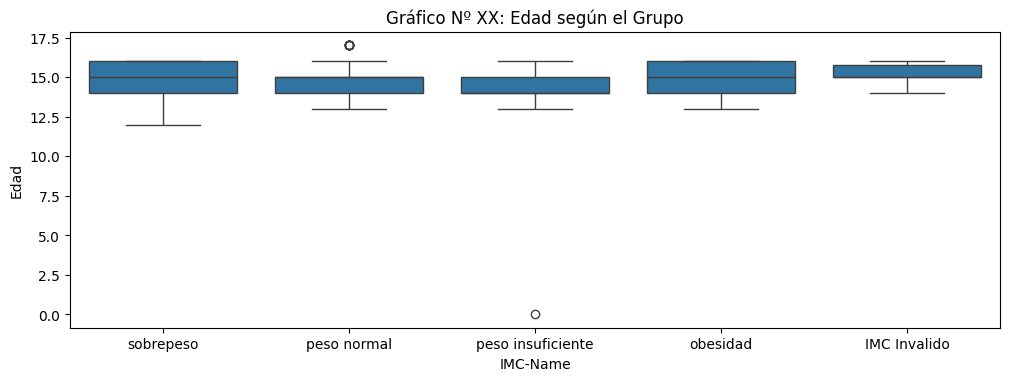

In [ ]:
#import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 3.84))

g=sns.boxplot(
        x     = 'IMC-Name',  # variable cualitativa
        y     = 'edad',  # variable cuantitativa
        data  = df,   # dataframe
        ax    = ax
    )

g.set_xlabel("IMC-Name")
g.set_ylabel("Edad")
g.set_title("Gráfico Nº XX: Edad según el Grupo")

### 3.Rango intercuartil

In [ ]:
def rango_intercuartil(x: pd.Series): # RIC
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q3 = x.quantile([.75]).values[0]

    return Q1, Q3 - Q1, Q3

In [ ]:
d= df[var_numCol].apply(rango_intercuartil, axis=0).T
d.columns = ["Q1","RIC","Q3"]
d

Q1        RIC          Q3
talla                        153.700000  10.000000  163.700000
edad                          14.000000   1.000000   15.000000
peso_kg                       51.000000  10.700000   61.700000
circun_cuello                 30.700000   2.800000   33.500000
IMC                           20.274879   3.639472   23.914351
circun_cintura                70.000000   8.000000   78.000000
cadera                        85.000000   9.000000   94.000000
ind_cintura_cadera             0.794296   0.072535    0.866831
ind_cintura_estatura           0.438694   0.055786    0.494481
por_grasa_corporal            15.971877  14.101616   30.073493
masa_corporal_magra_kg        38.154599   9.966258   48.120857
pliegue_cutaneo_BICEPS         5.000000   7.000000   12.000000
pliegue_cutaneo_TRICEPS       11.000000   8.000000   19.000000
pliegue_cutaneo_ESCAPULAR     10.000000   8.000000   18.000000
pliegue_cutaneo_SUPRAILIACO   10.000000   9.000000   19.000000

### 4.Varianza (np.var).
 Esta función también omite los valores faltantes, como con la media

In [ ]:

df[var_numCol].apply(np.var  , axis=0).round(2)


talla                          55.83
edad                            1.11
peso_kg                        73.72
circun_cuello                   4.64
IMC                             9.27
circun_cintura                 47.76
cadera                         51.91
ind_cintura_cadera              0.00
ind_cintura_estatura            0.00
por_grasa_corporal             61.70
masa_corporal_magra_kg         47.94
pliegue_cutaneo_BICEPS         32.01
pliegue_cutaneo_TRICEPS        32.36
pliegue_cutaneo_ESCAPULAR      28.13
pliegue_cutaneo_SUPRAILIACO    35.39
dtype: float64

### 5.Desviación Estándar

In [ ]:

df[var_numCol].apply(np.std, axis=0).round(2)


talla                          7.47
edad                           1.05
peso_kg                        8.59
circun_cuello                  2.15
IMC                            3.04
circun_cintura                 6.91
cadera                         7.21
ind_cintura_cadera             0.05
ind_cintura_estatura           0.05
por_grasa_corporal             7.85
masa_corporal_magra_kg         6.92
pliegue_cutaneo_BICEPS         5.66
pliegue_cutaneo_TRICEPS        5.69
pliegue_cutaneo_ESCAPULAR      5.30
pliegue_cutaneo_SUPRAILIACO    5.95
dtype: float64

### 6.Coeficiente de variación

scipy.nanmean(x) Se utiliza para evitar los valores perdidos

In [ ]:
def coeficiente_variacion(x):
  m = scipy.nanmean(x) #stats.mean(x) #Se utiliza nanmean por la existencia de datos perdidos
  sd = np.std(x)
  return sd/m*100

In [ ]:

df[var_numCol].apply(coeficiente_variacion, axis=0).round(2), "Porciento %"


<ipython-input-57-ecde98878c18>:2: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  m = scipy.nanmean(x) #stats.mean(x)


(talla                           4.70
 edad                            7.14
 peso_kg                        15.08
 circun_cuello                   6.71
 IMC                            13.58
 circun_cintura                  9.27
 cadera                          8.02
 ind_cintura_cadera              6.58
 ind_cintura_estatura            9.86
 por_grasa_corporal             33.37
 masa_corporal_magra_kg         15.96
 pliegue_cutaneo_BICEPS         61.62
 pliegue_cutaneo_TRICEPS        36.35
 pliegue_cutaneo_ESCAPULAR      36.87
 pliegue_cutaneo_SUPRAILIACO    40.53
 dtype: float64,
 'Porciento %')

### Imputacion de los valores perdidos nan.
Se debe de imputar, paraevitar datos perdidos en los calaculos de curtosis y correlaciones.

In [ ]:
def imputacionData(x):
  m = scipy.nanmean(x) #stats.mean(x)
  return m

In [ ]:

#dMean = df.mean()

dMean = df[var_numCol].apply(imputacionData, axis=0).round(2)

df.fillna(dMean, inplace=True)


<ipython-input-64-fa360083a8d5>:2: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  m = scipy.nanmean(x) #stats.mean(x)


In [ ]:

df.isna().sum()


Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
IMC-Name                       0
Etapa-Vida                     0
dtype: int64

### 7.Cuantiles

Filtrado las edades, con la condicional de edad mayor a 0.
Con el fin de no tener edad minima en 0

In [ ]:
#gender_value = 'Male'
#filtered_df = df.query('edad > @age_threshold and gender == @gender_value')


age_threshold = 0
filtered_df = df.query('edad > @age_threshold')
Q = filtered_df["edad"].quantile([.90])


print("Mínimo:", min( filtered_df["edad"].round(2)) )
print('Cuantil -->', round(Q, 2))
print("Máximo:", max( filtered_df["edad"].round(2)) )

Mínimo: 12.0
Cuantil --> 0.9    16.0
Name: edad, dtype: float64
Máximo: 17.0


###8.Curtosis

#### Calculo de curtosis

In [ ]:
from scipy.stats import kurtosis

In [ ]:
def kurtosis_data(x):

  curtosis =  kurtosis(x, fisher=True)
  if curtosis != np.NAN:

    if curtosis >0:
      return ('Es Leptocúrtica-->', round(curtosis,2 ))
    elif curtosis ==0: # 0.03
      return  ('Es Mesocúrtica-->', round(curtosis,2 ))
    else:
      return  ('Es Platicúrtica-->', round(curtosis,2 ))



In [ ]:
df[var_numCol].apply(kurtosis_data, axis=0).T

0      1
talla                        Es Leptocúrtica-->   0.08
edad                         Es Leptocúrtica-->  58.47
peso_kg                      Es Leptocúrtica-->   1.41
circun_cuello                Es Leptocúrtica-->   0.34
IMC                          Es Leptocúrtica-->   1.94
circun_cintura               Es Leptocúrtica-->   1.64
cadera                       Es Leptocúrtica-->   1.27
ind_cintura_cadera           Es Leptocúrtica-->   0.41
ind_cintura_estatura         Es Leptocúrtica-->    1.8
por_grasa_corporal           Es Platicúrtica-->  -1.11
masa_corporal_magra_kg       Es Leptocúrtica-->   0.41
pliegue_cutaneo_BICEPS       Es Leptocúrtica-->  62.17
pliegue_cutaneo_TRICEPS      Es Leptocúrtica-->   0.06
pliegue_cutaneo_ESCAPULAR    Es Leptocúrtica-->   0.72
pliegue_cutaneo_SUPRAILIACO  Es Platicúrtica-->  -0.31

#C.CORRELACIONES "R DE PEARSON" & "RHO DE SPEARMAN"

<Figure size 600x400 with 0 Axes>

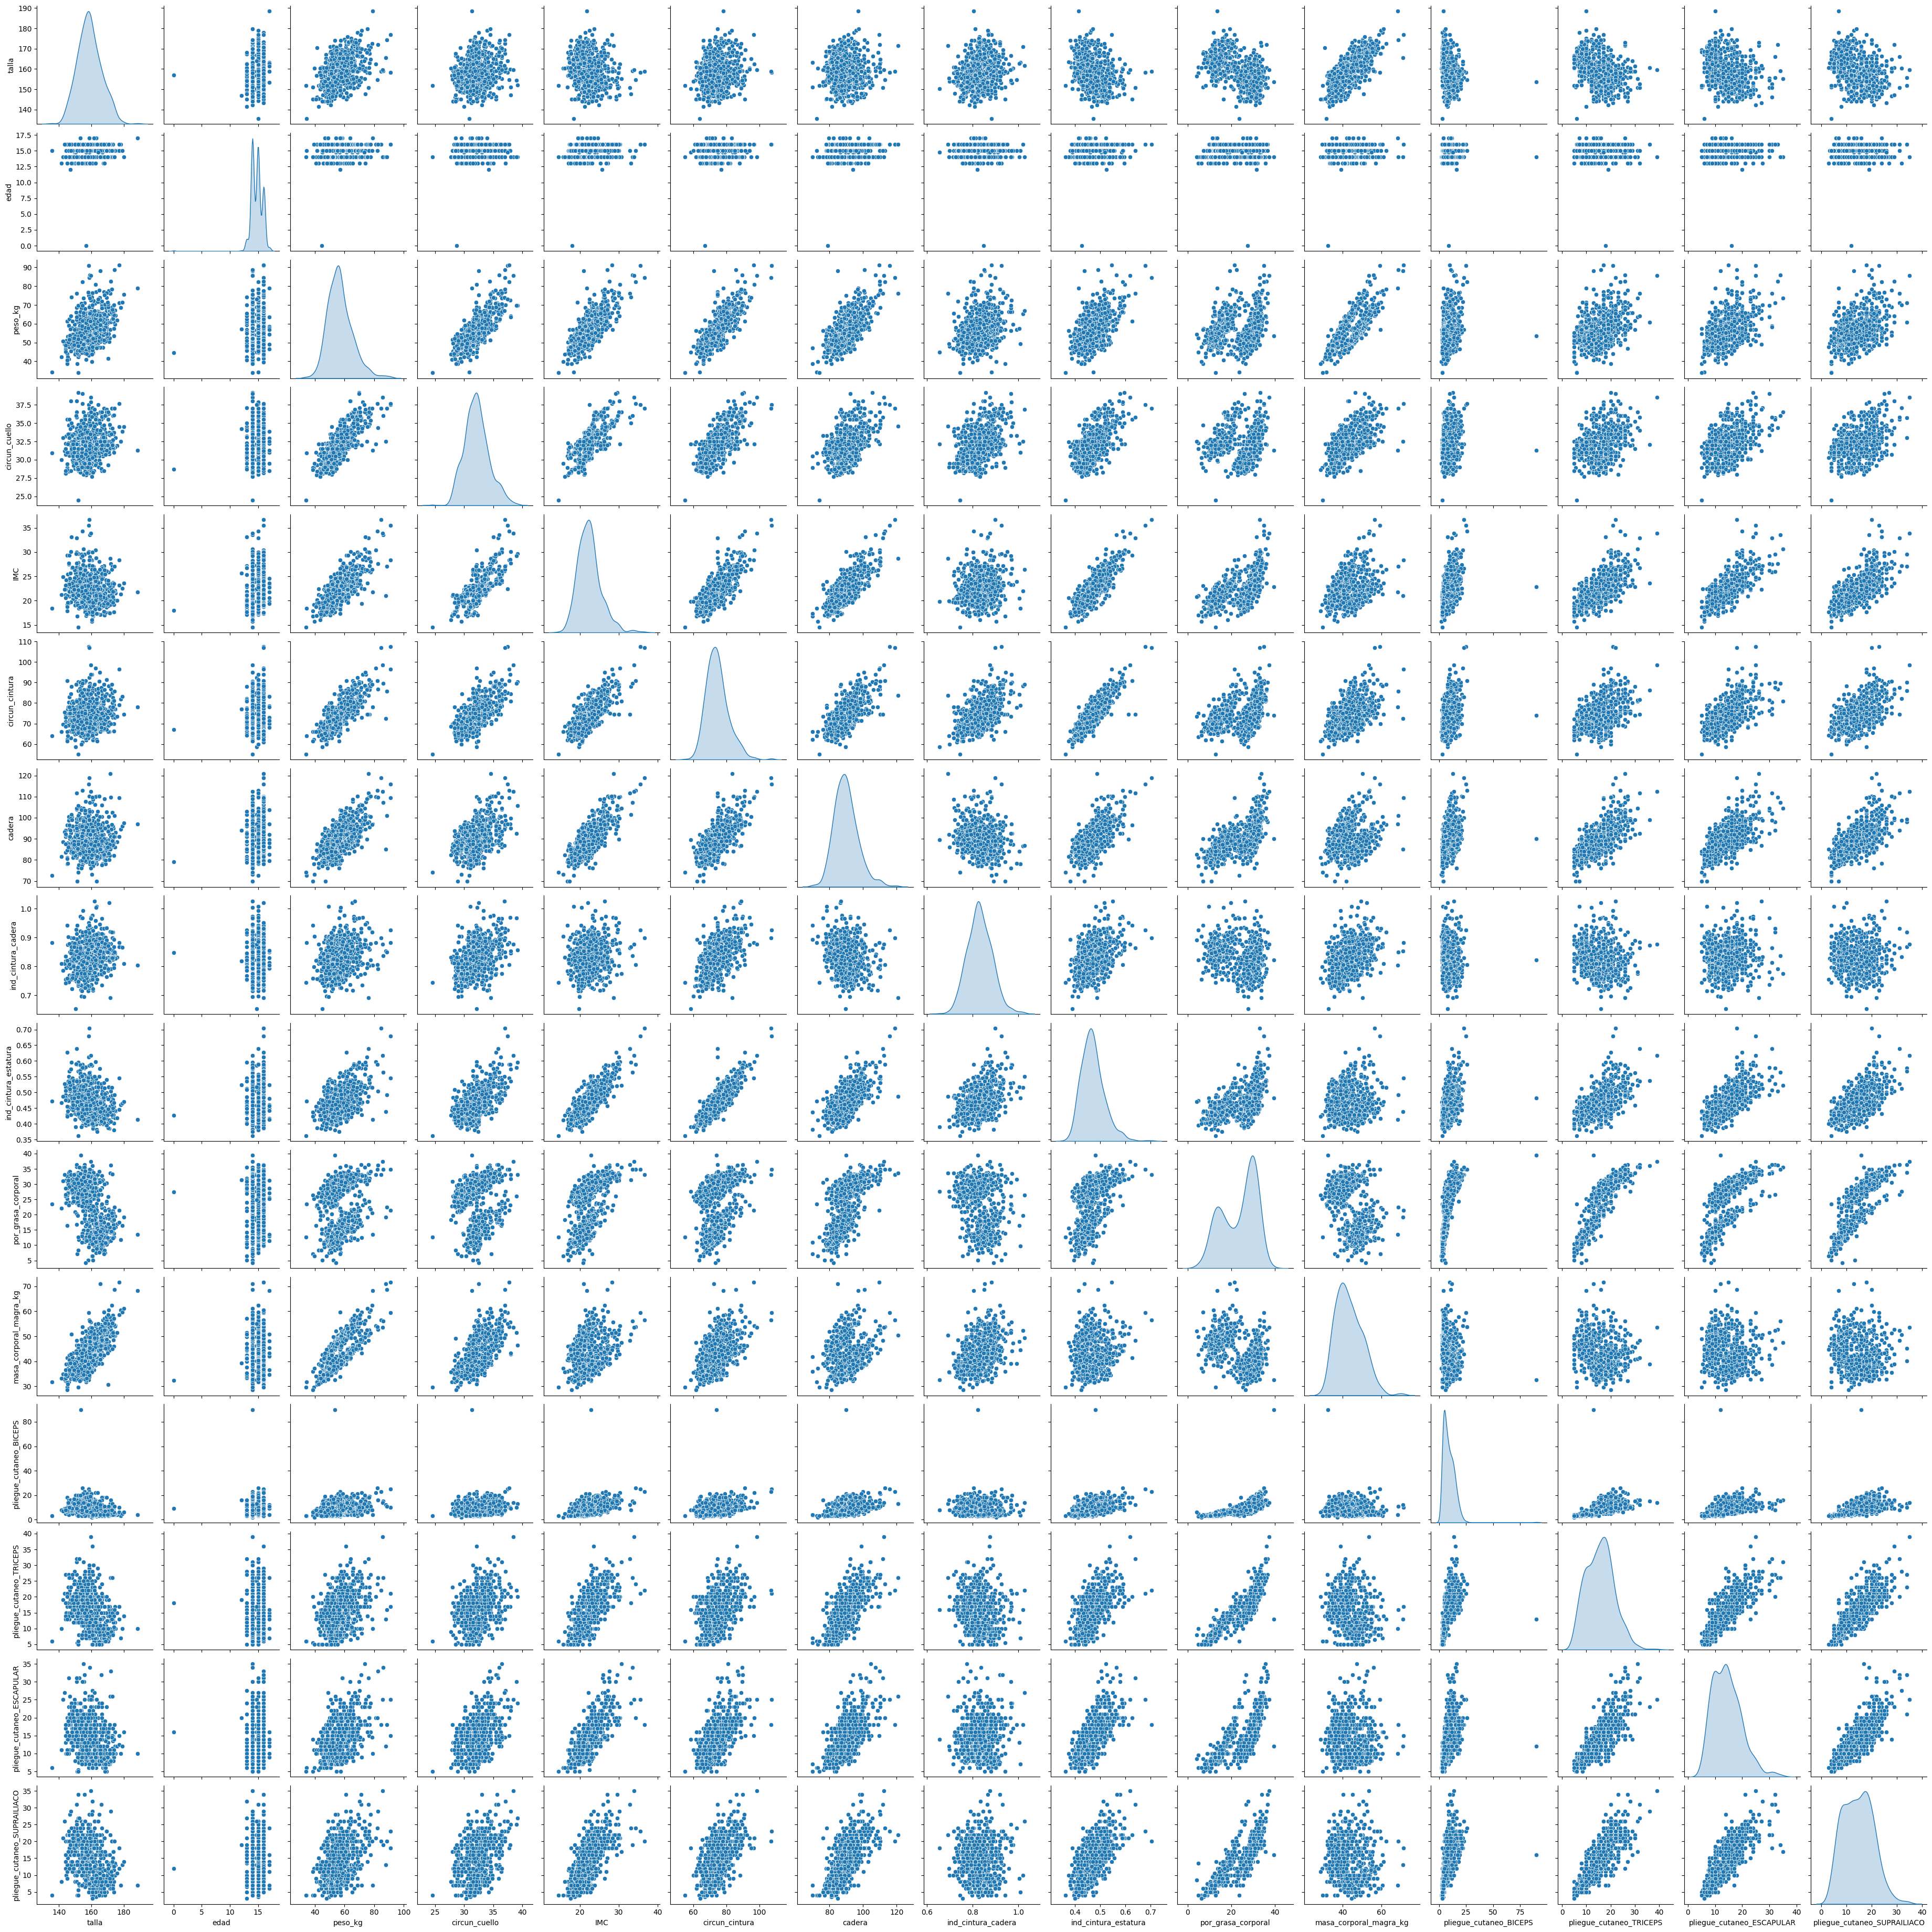

In [ ]:
plt.figure(figsize=(6,4))

sns.pairplot(df[var_numCol], diag_kind='kde');

###Correlación: r de pearson

In [ ]:
correlacion = df[var_numCol].corr(method='pearson').round(3)  # paramétrico

correlacion

talla   edad  peso_kg  circun_cuello    IMC  \
talla                        1.000  0.089    0.462          0.185 -0.149   
edad                         0.089  1.000    0.145          0.098  0.147   
peso_kg                      0.462  0.145    1.000          0.752  0.745   
circun_cuello                0.185  0.098    0.752          1.000  0.757   
IMC                         -0.149  0.147    0.745          0.757  1.000   
circun_cintura               0.163  0.156    0.776          0.692  0.768   
cadera                       0.024  0.174    0.689          0.494  0.780   
ind_cintura_cadera           0.203  0.014    0.277          0.391  0.159   
ind_cintura_estatura        -0.307  0.113    0.544          0.592  0.828   
por_grasa_corporal          -0.505  0.051    0.202          0.112  0.591   
masa_corporal_magra_kg       0.748  0.108    0.772          0.623  0.308   
pliegue_cutaneo_BICEPS      -0.307 -0.028    0.205          0.132  0.451   
pliegue_cutaneo_TRICEPS     -0.356  0.026    0.346          0.292  0.664   
pliegue_cutaneo_ESCAPULAR   -0.258  0.065    0.481          0.466  0.741   
pliegue_cutaneo_SUPRAILIACO -0.305  0.065    0.410          0.369  0.680   

                             circun_cintura  cadera  ind_cintura_cadera  \
talla                                 0.163   0.024               0.203   
edad                                  0.156   0.174               0.014   
peso_kg                               0.776   0.689               0.277   
circun_cuello                         0.692   0.494               0.391   
IMC                                   0.768   0.780               0.159   
circun_cintura                        1.000   0.698               0.529   
cadera                                0.698   1.000              -0.202   
ind_cintura_cadera                    0.529  -0.202               1.000   
ind_cintura_estatura                  0.858   0.670               0.411   
por_grasa_corporal                    0.347   0.620              -0.255   
masa_corporal_magra_kg                0.489   0.239               0.408   
pliegue_cutaneo_BICEPS                0.283   0.405              -0.091   
pliegue_cutaneo_TRICEPS               0.440   0.677              -0.190   
pliegue_cutaneo_ESCAPULAR             0.595   0.654               0.069   
pliegue_cutaneo_SUPRAILIACO           0.523   0.657              -0.048   

                             ind_cintura_estatura  por_grasa_corporal  \
talla                                      -0.307              -0.505   
edad                                        0.113               0.051   
peso_kg                                     0.544               0.202   
circun_cuello                               0.592               0.112   
IMC                                         0.828               0.591   
circun_cintura                              0.858               0.347   
cadera                                      0.670               0.620   
ind_cintura_cadera                          0.411              -0.255   
ind_cintura_estatura                        1.000               0.573   
por_grasa_corporal                          0.573               1.000   
masa_corporal_magra_kg                      0.127              -0.434   
pliegue_cutaneo_BICEPS                      0.419               0.705   
pliegue_cutaneo_TRICEPS                     0.596               0.877   
pliegue_cutaneo_ESCAPULAR                   0.700               0.755   
pliegue_cutaneo_SUPRAILIACO                 0.652               0.839   

                             masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
talla                                         0.748                  -0.307   
edad                                          0.108                  -0.028   
peso_kg                                       0.772                   0.205   
circun_cuello                                 0.623                   0.132   
IMC                                           0

####Mapa de Calor correlación de las variables numéricas

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

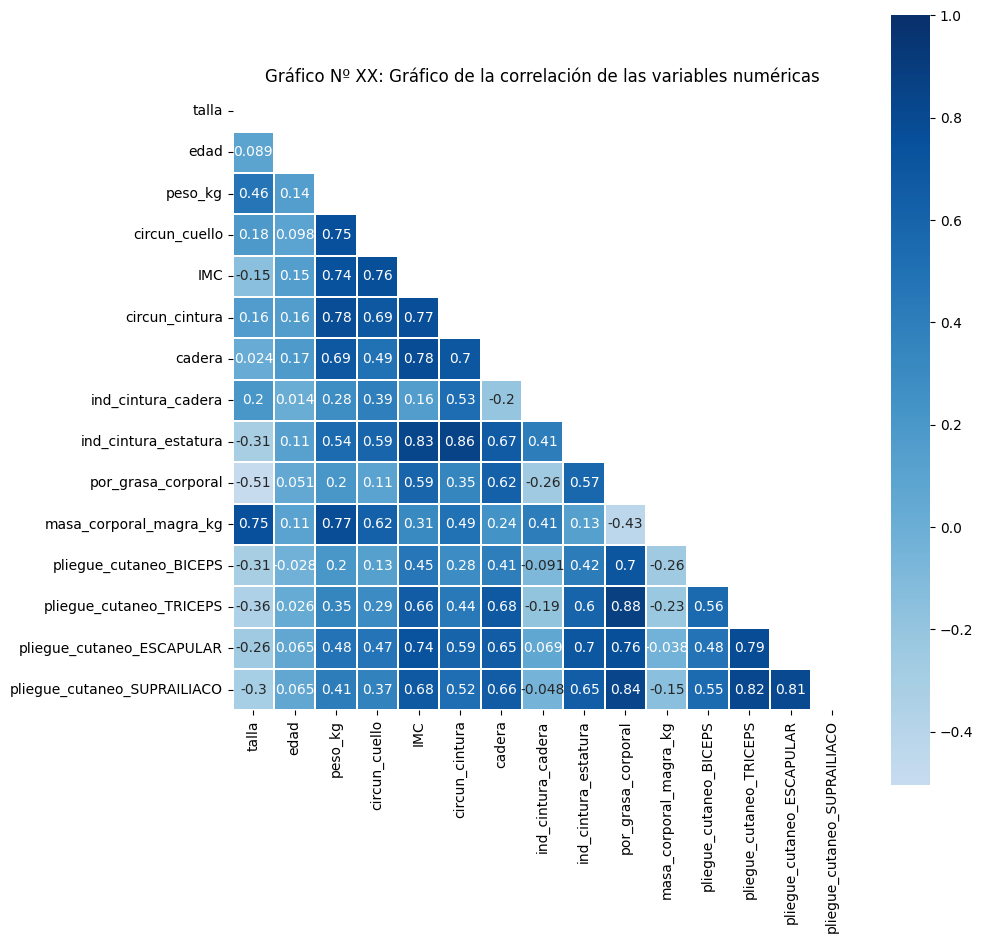

In [ ]:
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")

####scatterplot correlación de variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        652 non-null    float64
 2   edad                         652 non-null    float64
 3   peso_kg                      652 non-null    float64
 4   circun_cuello                652 non-null    float64
 5   IMC                          652 non-null    float64
 6   circun_cintura               652 non-null    float64
 7   cadera                       652 non-null    float64
 8   ind_cintura_cadera           652 non-null    float64
 9   ind_cintura_estatura         652 non-null    float64
 10  por_grasa_corporal           652 non-null    float64
 11  masa_corporal_magra_kg       652 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

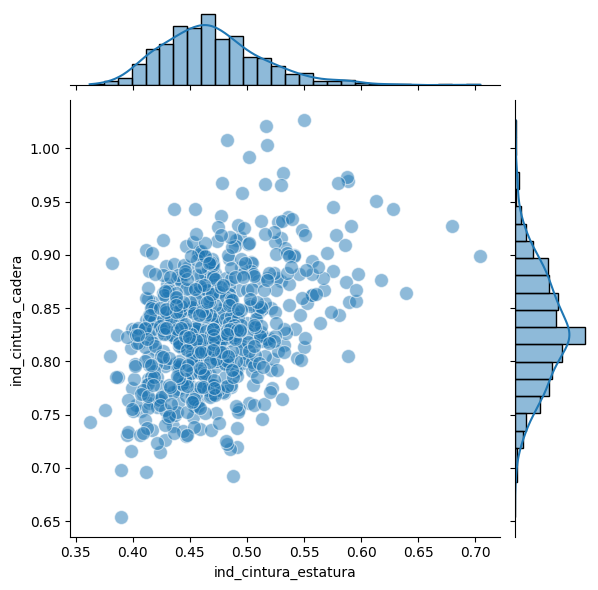

In [ ]:
g = sns.JointGrid(x="ind_cintura_estatura", y="ind_cintura_cadera", data=df)

g.plot_joint(sns.scatterplot, s=100, alpha=.5)  # Efectos de las bubujas s=100, alpha=.5
g.plot_marginals(sns.histplot, kde=True)

####scatterplotcon linea de tendencia

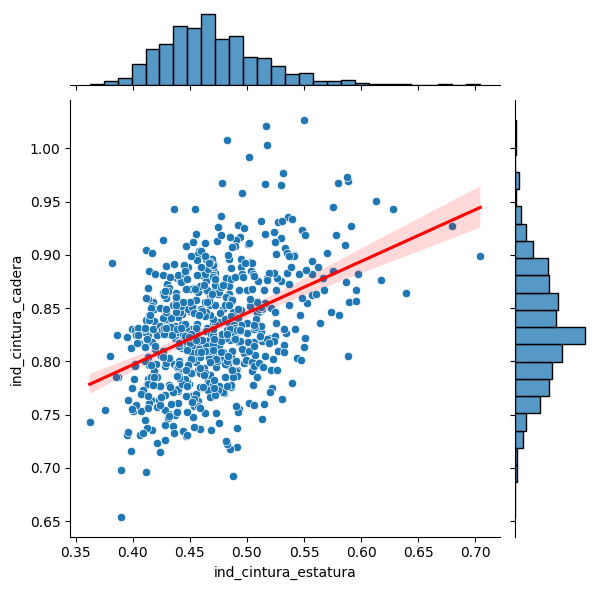

In [ ]:
# con línea de tendencia

g=sns.jointplot(x=df['ind_cintura_estatura'], y=df['ind_cintura_cadera'])
sns.regplot(data=df, x= 'ind_cintura_estatura', y='ind_cintura_cadera', ax=g.ax_joint, scatter=False, color= 'red')
plt.show();


####scatterplotcon linea de tendencia por grupos

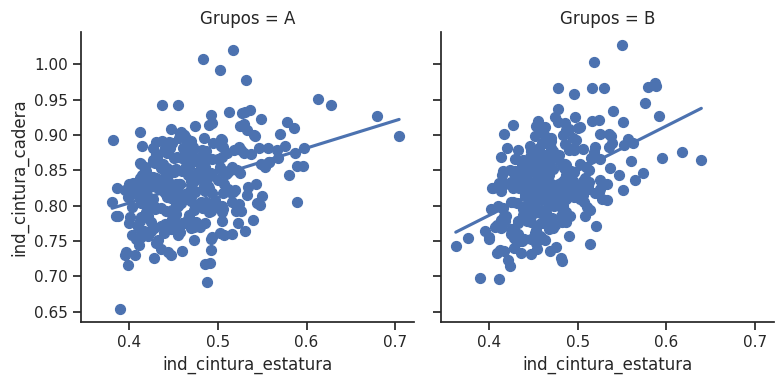

In [ ]:
#g=sns.jointplot(x=df['ind_cintura_estatura'], y=df['ind_cintura_cadera'])

#Grupos Variable cualitativa digtonica

sns.set(style="ticks")
sns.lmplot(x="ind_cintura_estatura", y="ind_cintura_cadera", col='Grupos', data=df,
               col_wrap=2, ci=None, palette="muted", height=4,
               scatter_kws={"s": 50, "alpha": 1});

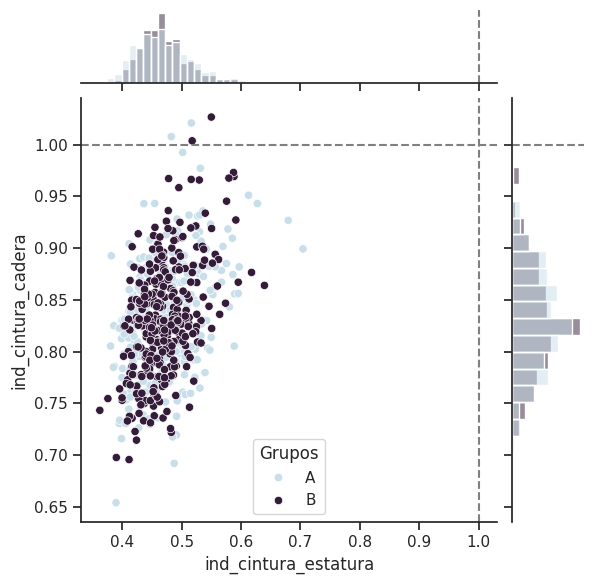

In [ ]:

g = sns.JointGrid(x="ind_cintura_estatura", y="ind_cintura_cadera"
                  , data=df,  hue="Grupos", palette = "ch:s=.50,rot=-.35")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=1, y=1)


##Correlación: Rho de Spearman

In [ ]:
Rho = df[var_numCol].corr(method='spearman').round(3) # no paramétrico
Rho

talla   edad  peso_kg  circun_cuello    IMC  \
talla                        1.000  0.089    0.448          0.179 -0.185   
edad                         0.089  1.000    0.134          0.095  0.147   
peso_kg                      0.448  0.134    1.000          0.739  0.702   
circun_cuello                0.179  0.095    0.739          1.000  0.745   
IMC                         -0.185  0.147    0.702          0.745  1.000   
circun_cintura               0.151  0.147    0.764          0.679  0.733   
cadera                      -0.038  0.148    0.631          0.453  0.738   
ind_cintura_cadera           0.233  0.027    0.286          0.375  0.129   
ind_cintura_estatura        -0.348  0.096    0.472          0.551  0.792   
por_grasa_corporal          -0.496  0.062    0.240          0.173  0.646   
masa_corporal_magra_kg       0.740  0.084    0.747          0.614  0.252   
pliegue_cutaneo_BICEPS      -0.421 -0.019    0.195          0.130  0.540   
pliegue_cutaneo_TRICEPS     -0.404  0.041    0.311          0.258  0.671   
pliegue_cutaneo_ESCAPULAR   -0.305  0.082    0.450          0.421  0.754   
pliegue_cutaneo_SUPRAILIACO -0.344  0.062    0.378          0.319  0.696   

                             circun_cintura  cadera  ind_cintura_cadera  \
talla                                 0.151  -0.038               0.233   
edad                                  0.147   0.148               0.027   
peso_kg                               0.764   0.631               0.286   
circun_cuello                         0.679   0.453               0.375   
IMC                                   0.733   0.738               0.129   
circun_cintura                        1.000   0.669               0.509   
cadera                                0.669   1.000              -0.216   
ind_cintura_cadera                    0.509  -0.216               1.000   
ind_cintura_estatura                  0.829   0.642               0.352   
por_grasa_corporal                    0.381   0.654              -0.241   
masa_corporal_magra_kg                0.474   0.164               0.444   
pliegue_cutaneo_BICEPS                0.301   0.510              -0.170   
pliegue_cutaneo_TRICEPS               0.412   0.674              -0.235   
pliegue_cutaneo_ESCAPULAR             0.594   0.652               0.038   
pliegue_cutaneo_SUPRAILIACO           0.497   0.670              -0.099   

                             ind_cintura_estatura  por_grasa_corporal  \
talla                                      -0.348              -0.496   
edad                                        0.096               0.062   
peso_kg                                     0.472               0.240   
circun_cuello                               0.551               0.173   
IMC                                         0.792               0.646   
circun_cintura                              0.829               0.381   
cadera                                      0.642               0.654   
ind_cintura_cadera                          0.352              -0.241   
ind_cintura_estatura                        1.000               0.619   
por_grasa_corporal                          0.619               1.000   
masa_corporal_magra_kg                      0.063              -0.399   
pliegue_cutaneo_BICEPS                      0.507               0.864   
pliegue_cutaneo_TRICEPS                     0.604               0.910   
pliegue_cutaneo_ESCAPULAR                   0.728               0.825   
pliegue_cutaneo_SUPRAILIACO                 0.664               0.878   

                             masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
talla                                         0.740                  -0.421   
edad                                          0.084                  -0.019   
peso_kg                                       0.747                   0.195   
circun_cuello                                 0.614                   0.130   
IMC                                           0

##### Rho de Spearman Mapa de Calor para variables con datos perdidos

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación Rho de Spearman')

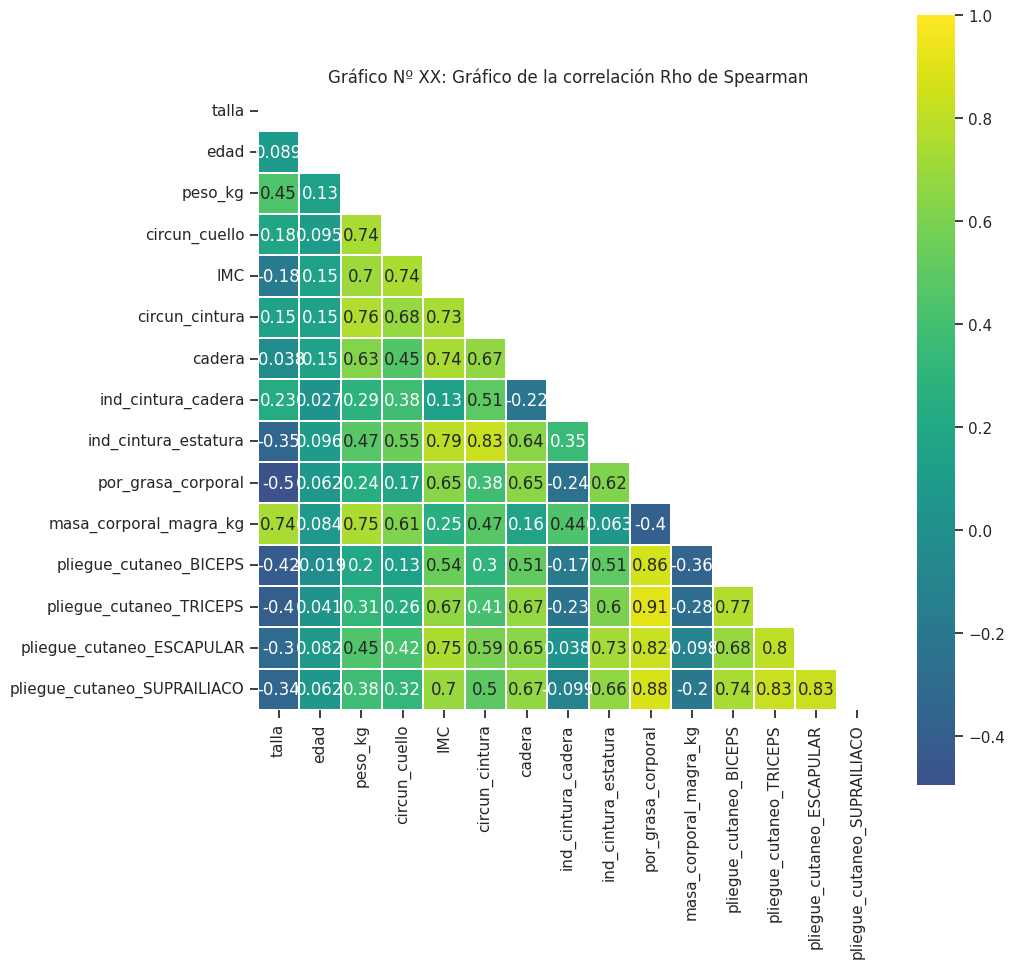

In [ ]:

mask = np.triu(np.ones_like(Rho, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(Rho, mask = mask, cmap='viridis', vmax=1, center = 0,
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación Rho de Spearman")
